# Heart Disease

Heart disease is the leading cause of death in the United States. The term “heart disease” refers to several types of heart conditions. In the United States, the most common type of heart disease is coronary artery disease (CAD), which can lead to heart attack.

For this reseasrch we will use these steps:
1. Problem definition
2. Data 
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

<image src="images/6-steps-of-ds.png" />

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

This database contains 6 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## 3. Evaluation

> If we can reach 95% accuracy  at predicting whether or not a patient has a heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data

**Create data dictionary**

* `age` in years
* `sex`(1 = male;0 = female)
* `cpchest` pain type
* `trestbpsresting blood pressure` (in mm Hg on admission to the hospital)
* `cholserum` cholestoral in mg/dl
* `fbs`(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* `restecgresting` electrocardiographic results
* `thalach` maximum heart rate achieved
* `exangexercise` induced angina (1 = yes; 0 = no)
* `oldpeakST` depression induced by exercise relative to rest
* `slopethe` slope of the peak exercise ST segment
* `canumber` of major vessels (0-3) colored by flourosopy
* `thal` 3 = normal; 6 = fixed defect; 7 = reversable defect
* `target` 1 or 0

### So Let's Start Step 2

Now we'll divide the data to X and y(train and test split) and visualize them by viewing in matplotlib and seaborn

For now, let's import all required libraries

In [28]:
# Regular EDA (exploretory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Now let's import classification models

<image src="images/AI-classification-models.png" />

So we need
* Random Forest
* K-Nearest Neighbors
* Decision Trees
* Naive Bayes
* Support Vector Machines
* Logistic Regression

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Now let's prepare other things as well

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

In [5]:
# Let's import our file
df = pd.read_csv("csv-files/heart-disease.csv")

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Fortunately we have all numeric data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Do we have any missing data?
df.isna().sum() # Fortunately, we don't)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Let's check with visualization

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

let's compare age, cp, thal with target

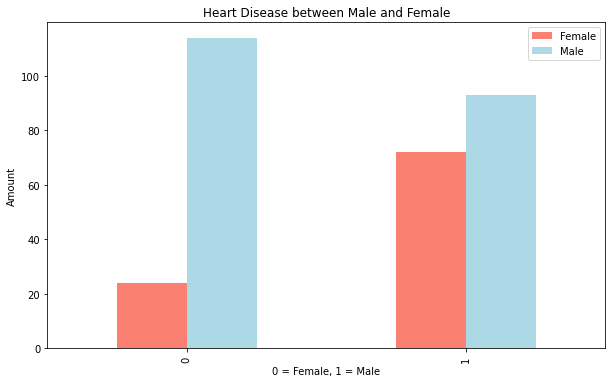

In [12]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.ylabel("Amount")
plt.xlabel("0 = Female, 1 = Male")
plt.title("Heart Disease between Male and Female")
plt.legend(["Female","Male"]);

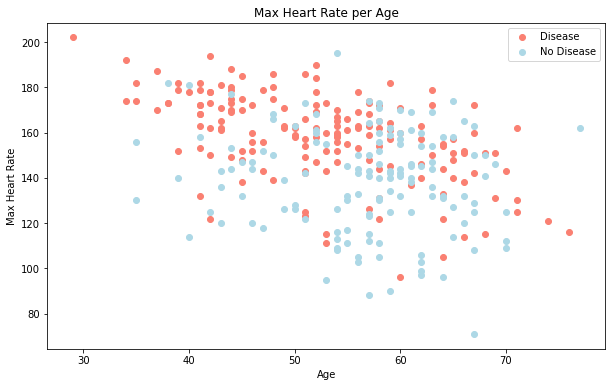

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(
    df.age[df.target==1],
    df.thalach[df.target==1],
    c=["salmon"])
plt.scatter(
    df.age[df.target==0],
    df.thalach[df.target==0],
    c=["lightblue"]
)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate per Age")

plt.legend(["Disease","No Disease"])

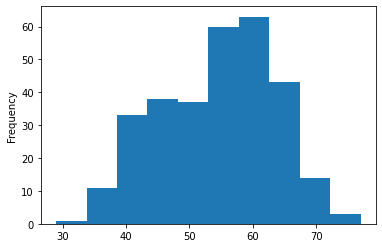

In [26]:
df.age.plot.hist();

In [35]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


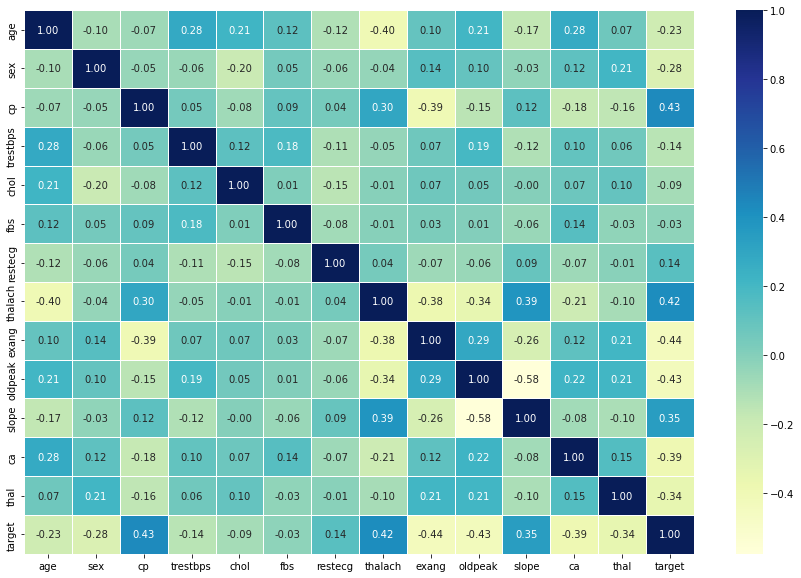

In [34]:
# Let's make it more visualized

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)


In [36]:
# Now let's divide to X and y
X = df.drop("target", axis=1)
y = df["target"]

And now let's divide them to X and y train and test

In [37]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [39]:
models_dict = {
    "RandomForestClassifier":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "GaussianNB":GaussianNB(),
    "SVC":SVC(),
    "LogisticRegression":LogisticRegression()
}

models_score = {}

In [40]:
np.random.seed(42)
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Function which takes the models and Train and Test Data and return the scores
    """
    result = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        result[model_name]=model.score(X_test, y_test)
    return result

In [41]:
models_score = fit_and_score(
    models=models_dict,
    X_train=X_train, 
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

models_score

/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Decision Tree': 0.8524590163934426,
 'GaussianNB': 0.8688524590163934,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442}

<AxesSubplot:>

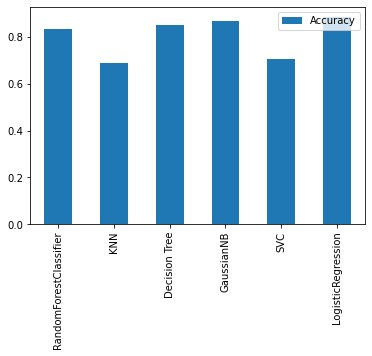

In [44]:
models_df = pd.DataFrame(models_score.values(), models_score.keys(), columns=["Accuracy"])
models_df.plot.bar()

Using these models we found out 4 best ones
* Random Forest Classifier
* Decision Tree
* Gaussian NB
* Logistic Regression

Now let's tune hyperparameters and find the best one

#### Let's Start with each step by step by looking to classification report, confusion matrix, ROC curve, and AUC 

In [46]:
# let's use RandomizedSearchCV... Now RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth":[None,2,3,5],
    "min_samples_split":np.arange(1,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

grid_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_grid,
    cv=5,
    n_iter=20,
    verbose=True)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
# Let's See best Parameters
grid_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 3,
 'min_samples_leaf': 15,
 'max_depth': None}

In [49]:
grid_rf.score(X_test, y_test)

0.8688524590163934

In [50]:
models_score

{'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Decision Tree': 0.8524590163934426,
 'GaussianNB': 0.8688524590163934,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442}

In [51]:
# We increased RandomForestClassifier by 3%
incresead_models = {"Increase RF":grid_rf.score(X_test, y_test)}

Now let's try with other models as well

In [52]:
dt_rs = {
    "max_depth":[None,2,3,5],
    "min_samples_split":np.arange(1,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "random_state":np.arange(10,1000,50),
    "criterion":["gini","entropy","log_loss"]
}

rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(),
    dt_rs,
    cv=5,
    n_iter=20,
    verbose=True)

rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'l

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 2, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'random_state': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
rs_dt.best_params_

{'random_state': 460,
 'min_samples_split': 17,
 'min_samples_leaf': 9,
 'max_depth': None,
 'criterion': 'gini'}

In [53]:
rs_dt.score(X_test, y_test)

0.8524590163934426

In [55]:
incresead_models["Increase DT"]=rs_dt.score(X_test, y_test)

In [57]:
nb_rs = {
    "var_smoothing":np.logspace(0,-9,num=100)
}

rs_nb = RandomizedSearchCV(
    GaussianNB(),
    nb_rs,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_nb.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [58]:
rs_nb.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [60]:
rs_nb.score(X_test, y_test)

0.8688524590163934

In [61]:
incresead_models["Increased NB"]=rs_nb.score(X_test, y_test)

In [62]:
# Now let's try with logistic Regression
lr_rs = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

rs_lr = RandomizedSearchCV(
    LogisticRegression(),
    lr_rs,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [64]:
incresead_models["Increased LR"]=rs_lr.score(X_test, y_test)

Now let's check improved models and see which model is the best

In [65]:
models_score, incresead_models

({'RandomForestClassifier': 0.8360655737704918,
  'KNN': 0.6885245901639344,
  'Decision Tree': 0.8524590163934426,
  'GaussianNB': 0.8688524590163934,
  'SVC': 0.7049180327868853,
  'LogisticRegression': 0.8852459016393442},
 {'Increase RF': 0.8688524590163934,
  'Increase DT': 0.8524590163934426,
  'Increased NB': 0.8688524590163934,
  'Increased LR': 0.8852459016393442})

So for this problem Logistic Regression was the best for scoring 0.8852

Now let's check `Confusion matrix`, `classification report`, `roc` curve and `auc`

In [66]:
clf = LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [68]:
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

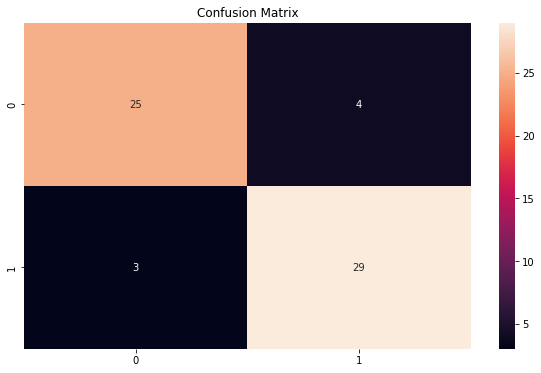

In [71]:
conf_mat = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(conf_mat, annot=True)
plt.title("Confusion Matrix")

In [72]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/home/abdulaziz/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


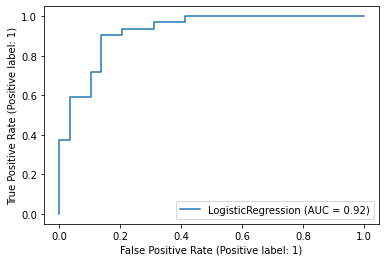

In [73]:
plot_roc_curve(clf, X_test, y_test)

In [76]:
# now let's check accuracy, precision, recall, and f1 score
cross_val_acc = np.mean(cross_val_score(clf,X, y, cv=5,scoring="accuracy"))
cross_val_acc

0.8479781420765027

In [77]:
cross_val_prec = np.mean(cross_val_score(clf,X,y, cv=5, scoring="precision"))
cross_val_prec

0.8215873015873015

In [78]:
cross_val_rec = np.mean(cross_val_score(clf, X,y,cv=5, scoring="recall"))
cross_val_rec

0.9272727272727274

In [79]:
cross_val_f1 = np.mean(cross_val_score(clf,X,y,cv=5,scoring="f1"))
cross_val_f1

0.8705403543192143

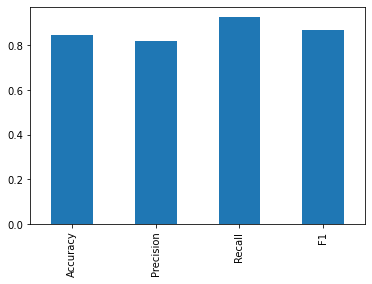

In [83]:
cv_metrics = pd.DataFrame({"Accuracy":cross_val_acc, "Precision":cross_val_prec, "Recall":cross_val_rec, "F1":cross_val_f1}, index=[0])
cv_metrics.T.plot.bar(legend=False);

In [84]:
# Now let's look at feature importance
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [86]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

<Figure size 720x432 with 0 Axes>

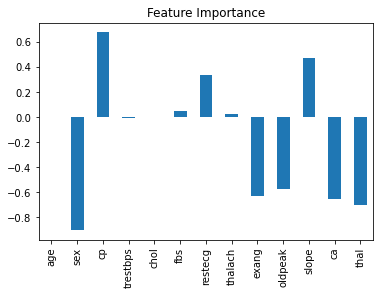

In [88]:
plt.figure(figsize=(10,6))
feature_dict_df = pd.DataFrame(feature_dict, index=[0])
feature_dict_df.T.plot.bar(legend=False, title="Feature Importance");

#### So looking by this we can understand that to solve this problem the most helpful was cp,restecg, slope


This was all about experimentation, may be we can improve the results, but for know, I came to this result... Anyway, it's all about experimentation

<image src="images/thank-you.jpeg" />